# GROUP PROJECT REPORT
Group 22 - Jeffery Hu, Ben Lu, Gurjas Singh Chawla, Feiran Hu

### Table of Contents
1. [Introduction](#i)
2. [Methods & Results](#mr)
   - [Loading Data](#loading-data)
   - [Wrangling, Tidying, and Cleaning Data](#wtcd)
   - [Exploratory Data Analysis Summary](#edas)
   - [Exploratory Data Analysis Visualization](#edav)
   - [Data Analysis & Visualization](#da)
4. [Discussion](#d)
5. [References](#r)

## Introduction <a name="i"/>
In data science, classification is the process where a set of observations is categorized into groups. K-nearest neighbour (KNN) is a form of classification, where these observations in a data set are grouped based on their similarity with their neighbours. This report will demonstrate data wrangling, summarization, and visualization before performing KNN classification on a training data set, then verifying our results via comparison with a testing data set as well as a thorough data analysis along with a post analysis discussion.

In sports, left-handed players tend to perform better than their right-handed opponents - many hypothesize that this could be due to the rarity of left-handed players which leads to right-handed players' lack of experience playing against lefties, or that left-handed people are simply more coordinated and athletically inclined. An example of such study conducted on a broad range of sports can be found [here](https://web.p.ebscohost.com/ehost/pdfviewer/pdfviewer?vid=0&sid=c75a114d-74c5-4457-9772-81880b8b39ea%40redis), or adjacently relevant, [this study](https://web.archive.org/web/20090324225537/http://www.ucd.ie/geary/publications/2004/laterality.pdf) on how left-handed people earn more wage. As such, we believe it would be interesting to see if there would be any correlation between a tennis player’s handedness and their other attributes, or more formally: 

Is there a relationship between the handedness of a tennis player with their current rank and age - i.e. can we derive the former by looking at their other attributes?

To answer our question we will be using the data set: "Player Stats for Top 500 Players" found [here](https://ultimatetennisstatistics.com/).

## Methods & Results <a name="mr"/>

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
library(gridExtra)
options(repr.matrix.max.rows = 4)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

### Loading Data <a name="loading-data" />
The first step to our data analysis is to load our data. As mentioned above, our data is found on the [Ultimate Tennis Statistics](https://www.ultimatetennisstatistics.com/) site and can be downloaded via [this Google Drive Link](https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS) as seen in the code cell below.

In [2]:
# tennis player data acquried from https://www.ultimatetennisstatistics.com/
url = "https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"
download.file(url, "player_data.csv")

# player data with only the columns we want
player_data_raw <- read_csv("player_data.csv")
player_data_raw

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
498,24 (17-05-1995),Ukraine,NA,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### Wrangling, Tidying, and Cleaning Data <a name="wtcd" />Wrangling, tidying, and cleaning data are all steps that are taken to ensure our data analysis can be performed smoothly and that the end result make sense. Below the raw player data is stripped of fields that we deem useless (such as the country a player is from as well as their various social media platforms) to our data analysis. Then the data with the remaining fields are formatted so that we can perform numeric summaries on them (i.e. turn the field age which contains the birthday and birthdays of a player, which is untidy, into a tidy variable with just the age of the player). Finally, we split the data into a training as well as a testing data set, with the former being the observations used to create our model and the latter used to verify the validity of our model (note this was operated on a cleaned up version of the player data, which our decision of omitting the player heights as a predictor as well as filtering out rows with null predictors was made after we conducted the EDA summary in the following section).

In [3]:
player_data <- player_data_raw |> select(Age, Plays, `Current Rank`, `Best Rank`, Backhand, Height)
colnames(player_data) <- c("age", "handedness", "curr_rank", "best_rank", "backhand_grip", "height") 

# player data formatted - char fields converted to numerical and categorical fields converted to factors
#                       - removes the necessary parts of each variable like the birthdays after each players' age,
#                         which is a cell that contains more than one value hence untidy
player_data_formatted <- player_data |>
    mutate(age = as.numeric(sapply(strsplit(age," "), getElement, 1)), 
           curr_rank = as.numeric(sapply(strsplit(curr_rank," "), getElement, 1)), 
           best_rank = as.numeric(sapply(strsplit(best_rank," "), getElement, 1)),
           height = as.numeric(sapply(strsplit(height," "), getElement, 1)),
           backhand_grip = as_factor(backhand_grip),
           handedness = as_factor(handedness)
          )

# player data clean - the decision to unselect height as well as select the non-null value for other predictors was
#                     made after conductiving the EDA summary
player_data_clean <- player_data_formatted |>
    select(handedness, age, curr_rank) |>
    filter(!is.na(handedness),
           !is.na(age),
           !is.na(curr_rank))

# set seed to ensure reproducibility of the split
set.seed(1234)

# splitting data into training and testing sets
players_split <- initial_split(player_data_clean, prop = 3/4, strata = handedness)
players_train <- training(players_split)
players_test <- testing(players_split)

players_train

handedness,age,curr_rank
<fct>,<dbl>,<dbl>
Left-handed,23,431
Left-handed,30,123
⋮,⋮,⋮
Right-handed,32,416
Right-handed,20,382


### Exploratory Data Analysis Summary <a name="edas"/>
This step of the process involves performing a preliminary and exploratory analysis on the data that will allow us to perform the actual analysis further down the line. A simple breakdown of each dataframe is as follows:
- `handedness_distribution`: this table filters for rows that have their handedness variables and groups the results by said handedness which allows us to see the distribution of handedness among players
- `missing_varibales`: this table allows us to see how many variables we are missing for each of the predictors by using summarize across all columns and counting the amount of missing variables, this gives us an idea of which variable we should put more emphasis on and which to potentially discard

Some crucial point we have to address before performing classification that can be answered with this summary includes:

**Q:** Do all of our observations have non-null handedness? **A:** As seen in the data frame `missing_variables` below, no not all observations has a handedness value. Since we cannot verify our accuracy if the actual handedness of a player is not known hence we will discard the observations with no handedness variables.

**Q:** Which of the currently selected predictors should be removed from the classification process? **A:** It seems that the majority of players are missing their height data so it wouldn't make sense to still include that variable. The backhand grip variable also has to be discarded as well due to it being a non-numeric variable as their distances cannot be calculated between two observations during the KNN classification process. Lastly, we will also be discarding the best rank variable due to the fact that if we're looking at the current rank in relation to a player's age and handedness, it doesn't make sense to include their best rank which could've been achieved many years ago.

**Q** Is there imbalance in the data? **A:** Yes, there is a clear disproportionate distribution of right and left handed players, which reflects real-life where only roughly 10% of people are left-handed [(source)](https://medlineplus.gov/genetics/understanding/traits/handedness/). As a result, we will slightly oversample the data (i.e. pick a higher k) when performing the classification process.


In [4]:
handedness_distribution <- player_data_formatted |>
    filter(!is.na(handedness)) |>
    group_by(handedness) |>
    summarize(count = n())

missing_variables <- player_data_formatted |>
    summarize(across(everything(), ~ sum(is.na(.))))

handedness_distribution
missing_variables

handedness,count
<fct>,<int>
Right-handed,391
Left-handed,62


age,handedness,curr_rank,best_rank,backhand_grip,height
<int>,<int>,<int>,<int>,<int>,<int>
1,47,5,1,92,385


### Exploratory Data Analysis Visualization <a name="edav"/>
To help us better understand our exploratory data analysis, we have created several figures to visualize the summary conducted above:

**Figure 1:** Distribution of the handedness of players - this allows us to once again see what the proportion of right-handed versus left-handed players is and informs us that the data is unbalanced (in favour of right-handed players). Due to this, we may need to oversample the observations involving left-handed players in order to get a better model.

**Figure 2:** Age vs Current rank with respect to handedness - this three-way relationship allows us to gain insight about if age affects ranking the same way in players that are right-handed vs players that are left-handed. From the figure shown, it does not appear there is a clear difference as despite the left-handed players having less observations (as mentioned above), the shape of the scatterplot is roughly the same.

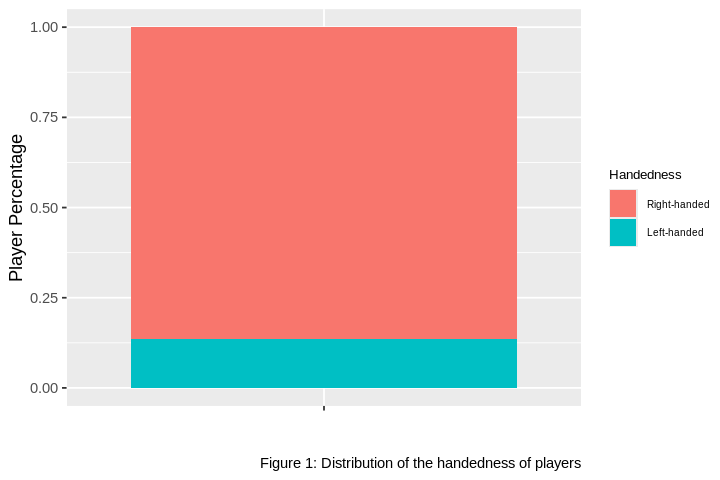

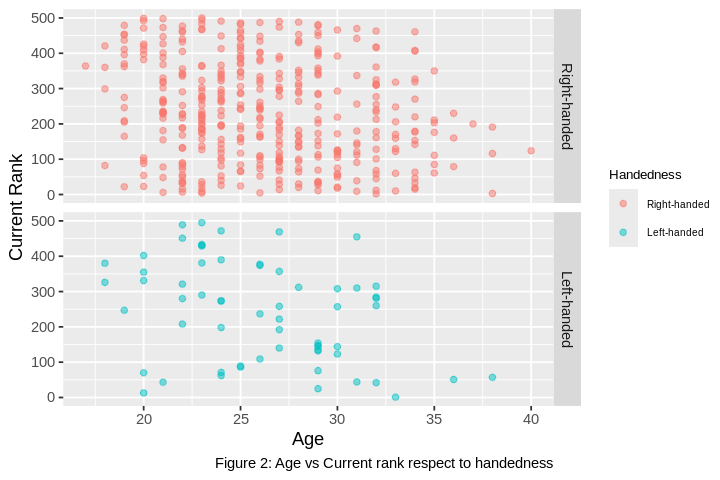

In [5]:
options(repr.plot.width = 6, repr.plot.height = 4)

# visualizes the distribution of the handedness of players
ggplot(handedness_distribution, aes(x = "", y = count, fill = handedness)) +
    geom_bar(stat = 'identity', position = 'fill') +
    labs(x="", y = "Player Percentage", fill = "Handedness", caption="Figure 1: Distribution of the handedness of players") +
    theme(
        legend.title = element_text(size = 8), 
        legend.text = element_text(size = 6)
    )

# visualizes the distribution of age v.s. current rank of a player in respect to handedness
players_age_rank_handedness <- player_data_clean |>
    filter(!is.na(handedness), !is.na(curr_rank), !is.na(age)) |>
    select(handedness, curr_rank, age)

ggplot(players_age_rank_handedness, aes(x = age, y = curr_rank, color = handedness)) +
    geom_point(alpha = 0.5) +
    labs(x="Age", y = "Current Rank", color = "Handedness", caption="Figure 2: Age vs Current rank respect to handedness") +
    facet_grid(rows = vars(handedness)) +
    theme(
        legend.title = element_text(size = 8), 
        legend.text = element_text(size = 6)
    )

### Data Analysis & Visualization <a name="da"/>

In order to perform the K-nearest neighbour classification with the best accuracy, it is necessary for us to perform a tuning and cross validation in order to produce an adequate number of neighbours k. To conduct a cross-validation on our training data, we will be using the `vfold_cv` function, which essentially breaks the training data set into C chunks (in our case 5) and repeatedly perform validation using one chunk as the training and the remaining chunks as testing, while the `collect_metrics` function tells us how well each of the k values perform in terms of accuracy.

In figure 3 we can see that initially with a low k value the accuracy for our model is relatively lower, but as k increases so does the model's accuracy, plateauing around and after k = 11 and even decreasing as our k gets too large and oversampling occurs. As mentioned above however, due to the imbalance in classes in our data (too many right handed players when compared to left handed ones) we will be keeping the k value relatively large - we will be using 11 as our `best_k`. 

Next, we will use the `fit` function to retrain our classifier to be used on our testing data set `players_test`. The `predict` function takes in the newly created model `knn_fit_new` and produces a new dataframe that has a new column `.pred_class` that indicates the prediction class for each observation, which we have stored in `predictions`.

Figure 4, also known as `comparison_plot` shows the original observations in the `players_train` data set in solid points with their colours corresponding to the actual handedness of each player, and the transparent points being the predicted class in `predictions`. The details of which as well as our other findings will be discussed in the [Discussion](#d) section below.

Lastly, we have produced a set of statistics in relation to our prediction:
- `accuracy`: obtained by using the `metrics` function on the `predictions` dataframe, it describes how accurate we have predicted the handedness of a player
- `precision`: obtained by using the `precision` function on the `predictions` dataframe as well as providing it the truth and predicted columns, it describes how many of the positive (right-handed) predictions made by our classifier were actually positive
- `recall`: obtained by using the `recall` function on the `predictions` dataframe as well as providing it the truth and predicted columns, it describes how how many of the true positive (right-handed) observations in `players_test` were correctly identified as positive
- `confusion_matrix`: obtained by using the `conf_mat` function on the `predictions` dataframe as well as providing it the truth and predicted columns, it represents a matrix of predicted vs actual handedness of players in the testing data set where the diagonal cells of the matrix are the cells that show correct predictions (in our case 97 correct predictions for right-handed and 0 for left-handed) 

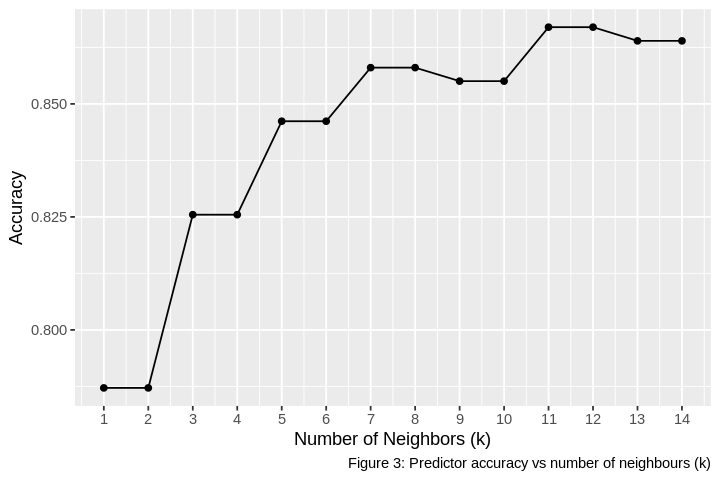

In [6]:
# set seed to ensure reproducitbility of 
set.seed(4321)

# test k values from 1 to 12
k_values <- c(1:14)

knn_recipe <- recipe(handedness ~ age + curr_rank, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |> 
    set_mode("classification")

players_vfold <- vfold_cv(players_train, v = 5, strata = handedness)

knn_workflow <- workflow() |>
       add_recipe(knn_recipe) |>
       add_model(knn_spec_tune)

resample_fit <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec_tune) |>
    tune_grid(resamples = players_vfold, grid = expand.grid(neighbors = k_values)) |>
    collect_metrics()

cross_val_plot <- resample_fit |>
    filter(.metric == "accuracy") |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Number of Neighbors (k)", y = "Accuracy", caption = "Figure 3: Predictor accuracy vs number of neighbours (k)") +
    scale_x_continuous(breaks = seq(0, 14, by = 1)) 

options(repr.plot.width = 6, repr.plot.height = 4)

cross_val_plot

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.85
precision,binary,0.86
recall,binary,0.99


              Truth
Prediction     Right-handed Left-handed
  Right-handed           97          16
  Left-handed             1           0

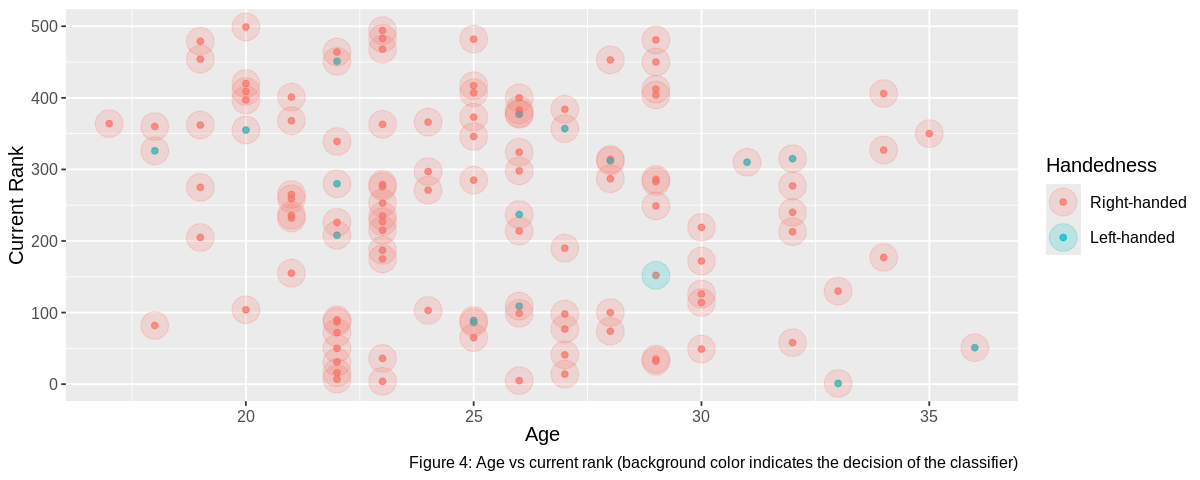

In [7]:
best_k <- 11
knn_spec_new <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit_new <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec_new) |>
    fit(data = players_train)

# predict on the testing data set using the model we just trained with the training data 
predictions <- predict(knn_fit_new, players_test) |>
    bind_cols(players_test)

options(repr.plot.width = 10, repr.plot.height = 4)

# compare the predicted to actual handedness on the players in the testing data set
comparison_plot <-
  ggplot() +
  geom_point(data = players_test, mapping = aes(x = age, y = curr_rank, color = handedness), alpha = 0.75) +
  geom_point(data = predictions, mapping = aes(x = age, y = curr_rank, color = .pred_class), alpha = 0.2, size = 7.5) +
  labs(color = "Handedness", x = "Age", y = "Current Rank", caption = "Figure 4: Age vs current rank (background color indicates the decision of the classifier)") +
  theme(text = element_text(size = 12))

comparison_plot

accuracy <- predictions |>
    metrics(truth = handedness, estimate = .pred_class) |>
    filter(.metric == "accuracy")

precision <- predictions |>
    precision(truth = handedness, estimate = .pred_class, event_level="first")

recall <- predictions |>
    recall(truth = handedness, estimate = .pred_class, event_level="first")

# combine accuracy, precision, and recall into one dataframe
statistics <- bind_rows(accuracy, precision, recall) |>
    mutate(.estimate = round(.estimate, digits = 2))

confusion_matrix <- predictions |>
    conf_mat(truth = handedness, estimate = .pred_class)

statistics
confusion_matrix

## Discussion <a name="d"/>

1. **Summarize what you found** <br>
   Based on the findings above, we see that when we performed the classification on the data set, we had a 85.08772% accuracy, a 85.84071% precision and a 98.97959% recall. When we look at our confusion matrix, we see that we had 97 true positives, 16 false positives and 1 false negative showing a high accuracy for right-hand players. However we see that the model struggles to effectively predict left-handedness. The spread of age and current rank could be more or less the same for left-hand and right-hand players, giving us the conclusion that left-hand players do not show an extraordinary physical performance in comparison with right-hand players based on the attributes we tried to predict with.
   
2. **Discuss whether this is what you expected to find?** <br>
In the proposal, we suggested that while it is possible for left-handed players to show extraordinary physical prowess and perform better than right-handed players statistically, we are realistically expecting there to be no correlations between players’ handedness and their tennis performance. In order to predict their physical performance, we chose what we thought were two of the most representative factors - current rank and age. Seeing as the model we trained and tested on the tennis player data cannot accurately differentiate left-handed players from right-handed ones, it is save to claim that our assumption is correct and our expectation of there being no real correlation between these attributes of players and their handedness has been met.

3. **Discuss what impact could such findings have?** <br>
Since left-handed players only account for 10% among all players, the conclusion that left-handed players have a natural born advantage in tennis or even sports in general could lead to more left-handed people who were not originally players to give tennis a shot. As mentioned in the proposal, such findings could impact how the sport is coached and analysized. By knowing how handedness and other attributes of a player contribute to their performance during games can give coaches a better idea on how to tailor the training programs as well as let coaches with right-handed players to develop strategies in order to counteract the left-handed advantages in the competitive scene of tennis.

4. **Discuss what future questions could this lead to?** <br>
Whilst conducting the classification, we only chose age and current rank as the criterias to evaluate right-hand and left-hand players as we believed them to be the most relevant factors. However, there are still many other variables which may influence a player's performance, such as their height (which we are missing a lot of rows in our data set otherwise it would have been included as a predictor), weight, BMI, or even gender. Further research would be required to determine if these additional attributes can be traced back and related to the handedness of a player in order to see if they affect their performance, since just because our findings in this report deems left and right handed players to have equal chances in success does not mean that is the case for all tennis players.


## References <a name="r"/>

Denny, K. & O’ Sullivan, V. (2007). THE ECONOMIC CONSEQUENCES OF BEING LEFT-HANDED: SOME SINISTER RESULTS. XLII (2) 353-374; https://doi.org/10.3368/jhr.XLII.2.353

Gallup, A. C., & Sleicher, E. (2021). Left-hand advantage and the right-sided selection hypothesis. Evolutionary Behavioral Sciences, 15(2), 184–190. https://doi.org/10.1037/ebs0000245

U.S. National Library of Medicine. (2022). Is handedness determined by genetics?: Medlineplus Genetics. MedlinePlus. https://medlineplus.gov/genetics/understanding/traits/handedness/